<a href="https://colab.research.google.com/github/ntando-memela/Function-Approximation-Demo/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cici118/damped-harmonic-oscillator")

print("Path to dataset files:", path)

100%|██████████| 29.6k/29.6k [00:00<00:00, 13.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/cici118/damped-harmonic-oscillator/versions/2


In [2]:
pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.9 MB/s eta 0:00:00


In [8]:
import deepxde as dde
import pandas as pd
import numpy as np


fname_train = "/root/.cache/kagglehub/datasets/cici118/damped-harmonic-oscillator/versions/2/completion/train.csv"
fname_test = "/root/.cache/kagglehub/datasets/cici118/damped-harmonic-oscillator/versions/2/completion/test.csv"


df_train = pd.read_csv(fname_train)
df_test = pd.read_csv(fname_test)

df_train.to_csv("train_clean.csv", index=False, header=False)
df_test.to_csv("test_clean.csv", index=False, header=False)

train = np.loadtxt("train_clean.csv", delimiter=",")
test  = np.loadtxt("test_clean.csv", delimiter=",")

X_train = train[:, 0:1]
y_train = train[:, 1:2]

X_test  = test[:, 0:1]
y_test  = test[:, 1:2]

Compiling model...
'compile' took 0.056994 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.81e-01]    [2.81e-01]    [3.90e+00]    
1000      [1.91e-02]    [1.84e-02]    [9.99e-01]    
2000      [1.91e-02]    [1.84e-02]    [9.98e-01]    
3000      [1.91e-02]    [1.83e-02]    [9.97e-01]    
4000      [1.90e-02]    [1.83e-02]    [9.97e-01]    
5000      [1.90e-02]    [1.83e-02]    [9.96e-01]    
6000      [1.89e-02]    [1.83e-02]    [9.95e-01]    
7000      [1.88e-02]    [1.82e-02]    [9.93e-01]    
8000      [1.87e-02]    [1.81e-02]    [9.92e-01]    
9000      [1.86e-02]    [1.81e-02]    [9.90e-01]    
10000     [1.85e-02]    [1.80e-02]    [9.87e-01]    
11000     [1.82e-02]    [1.78e-02]    [9.81e-01]    
12000     [1.75e-02]    [1.72e-02]    [9.66e-01]    
13000     [1.37e-02]    [1.38e-02]    [8.64e-01]    
14000     [1.20e-02]    [1.19e-02]    [8.03e-01]    
15000     [9.27e-03]    [9.45e-03]    [7.16e-01]    
16000     [4.76e-03]    [4.91e-03]

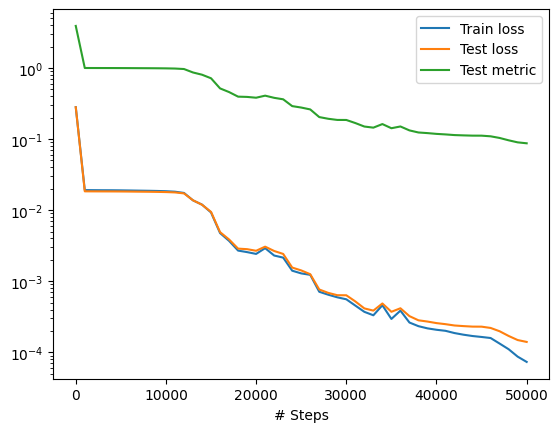

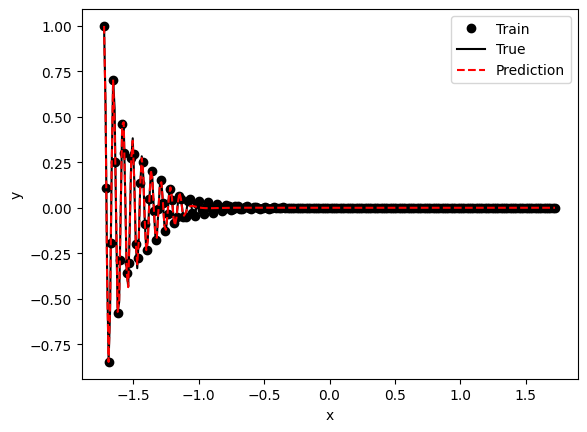

In [9]:
data = dde.data.DataSet(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    standardize=True,
)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)